In [1]:
from fastai.vision.all import *
path = untar_data(URLs.PETS)/'images'

In [3]:
files = get_image_files(path)

In [5]:
def is_cat(x):
    return x[0].isupper()

7390

In [9]:
dls = ImageDataLoaders.from_name_func(path,files,label_func = is_cat, valid_pct = 0.2, seed = 69, item_tfms = Resize(256, method = 'pad'), num_workers = 4)

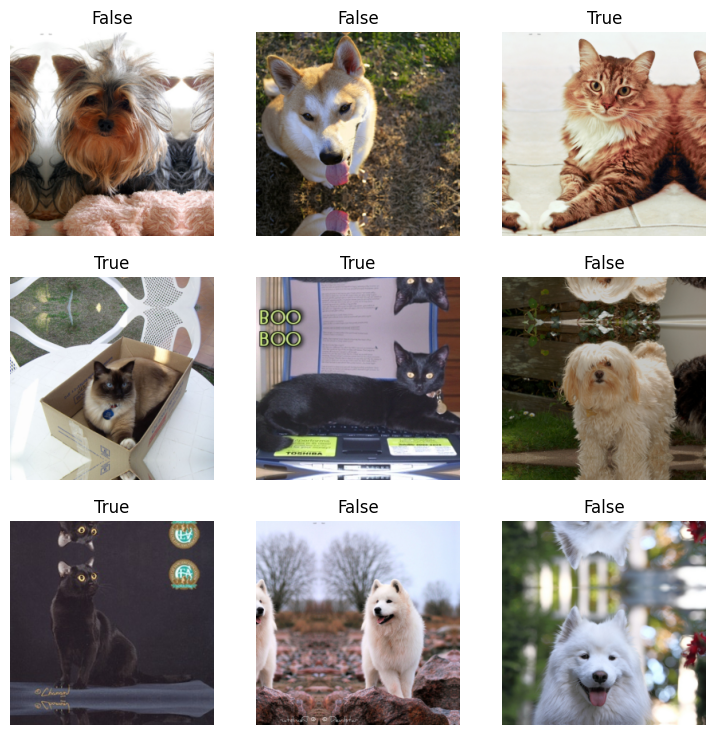

In [10]:
dls.show_batch()

C:\Users\Shwetansh Singh\miniconda3\envs\pipsetup\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Shwetansh Singh\miniconda3\envs\pipsetup\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0004786300996784121)

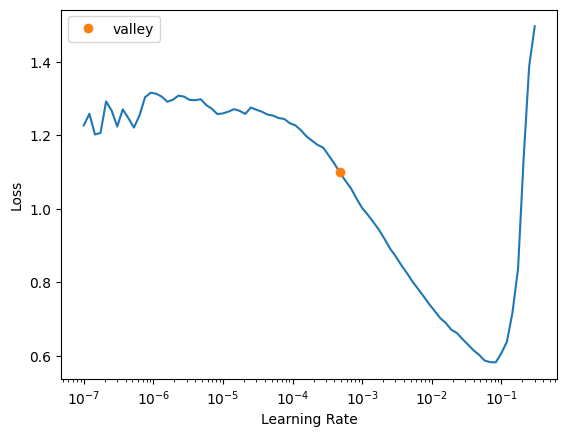

In [11]:
learn = vision_learner(dls, resnet34, metrics = error_rate)
learn.lr_find()

In [12]:
learn.fine_tune(3,8e-3)
learn.validate()

epoch,train_loss,valid_loss,error_rate,time
0,0.100305,0.033251,0.011502,06:53


epoch,train_loss,valid_loss,error_rate,time
0,0.104605,0.096567,0.038566,11:45
1,0.047659,0.054327,0.015562,11:45
2,0.017040,0.021233,0.006766,12:04


(#2) [0.02123335562646389,0.0067658997140824795]

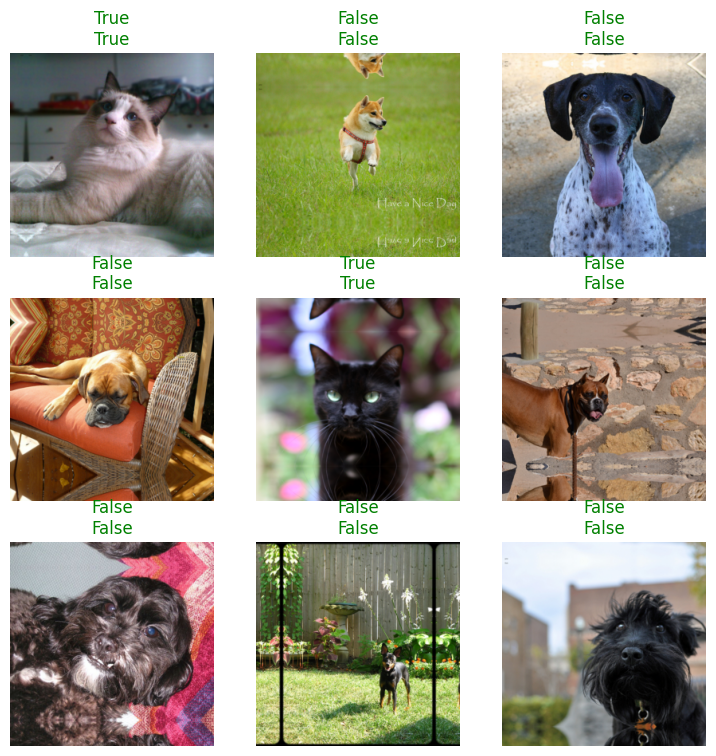

In [13]:
learn.show_results()

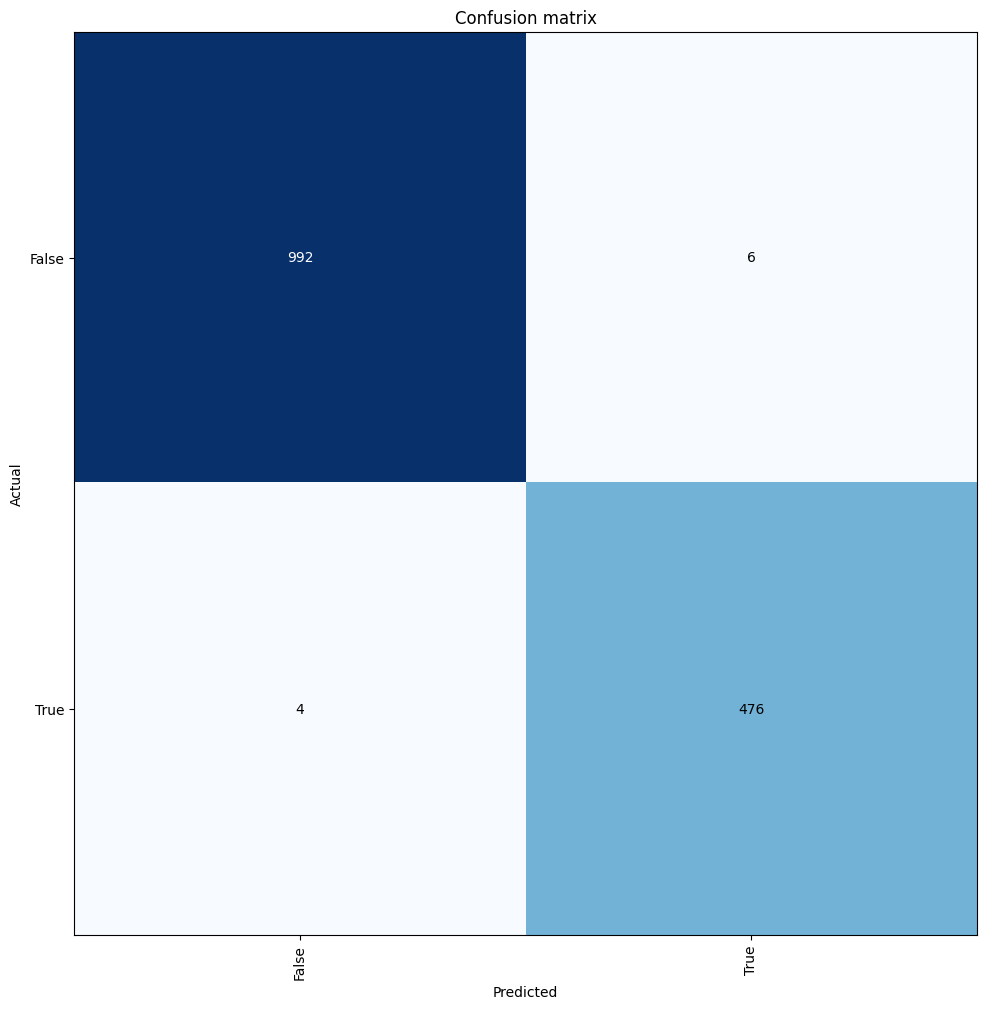

In [14]:
mat = ClassificationInterpretation.from_learner(learn)
mat.plot_confusion_matrix(figsize = (10,10))

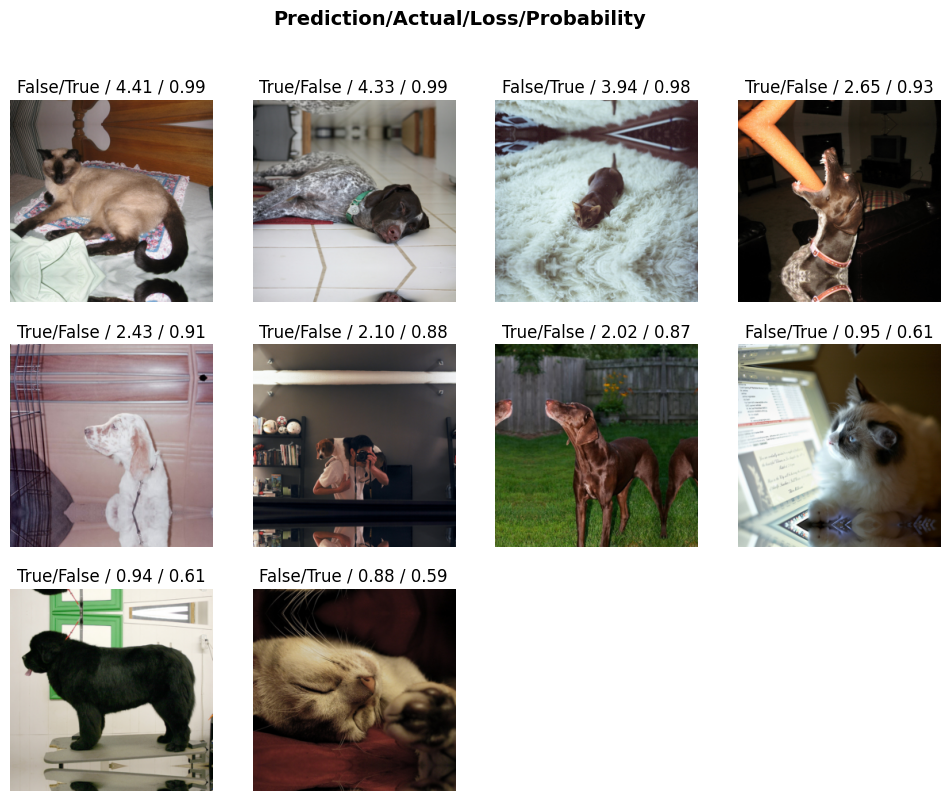

In [15]:
mat.plot_top_losses(10,nrows=3)

In [20]:
import dill
with open('catdog_model.pkl','wb') as f:
    dill.dump(learn,f)

In [23]:
path = Path()
path.ls(file_exts = '.pkl')

(#1) [Path('catdog_model.pkl')]